Filip Chrapla, 406161, sprawozdanie 6

In [39]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [3]:
F = len("Filip")
L = len("Chrapla")
N = (L + F) * 100

In [7]:
model1 = CmdStanModel(stan_file='/root/lab6.1/lab6/code_1.stan')
R = 1
sim1=model1.sample(data={'N': N},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

19:43:51 - cmdstanpy - INFO - compiling stan file /root/lab6.1/lab6/code_1.stan to exe file /root/lab6.1/lab6/code_1
19:44:46 - cmdstanpy - INFO - compiled model executable: /root/lab6.1/lab6/code_1
19:44:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


19:44:46 - cmdstanpy - INFO - CmdStan done processing.


In [8]:
mod1 = sim1.draws_pd()
mod1.head()

,chain__,iter__,draw__,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,1.0,1.0,1.0,0.0,0.0,0.01,-1.54848,0.565819,-0.257166,0.157896,...,0.275659,-1.65046,-0.562562,0.726237,-0.55427,0.945359,-1.52724,0.409662,-2.37478,2.74265


In [9]:
model2 = CmdStanModel(stan_file='/root/lab6.1/lab6/code_2.stan')
R = 1
sim2=model2.sample(data={'N': N},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

19:46:10 - cmdstanpy - INFO - compiling stan file /root/lab6.1/lab6/code_2.stan to exe file /root/lab6.1/lab6/code_2
19:46:42 - cmdstanpy - INFO - compiled model executable: /root/lab6.1/lab6/code_2
19:46:42 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


19:46:42 - cmdstanpy - INFO - CmdStan done processing.


In [10]:
mod2 = sim2.draws_pd()
mod2.head()

,chain__,iter__,draw__,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]",...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,1.0,1.0,1.0,0.0,0.0,-0.791184,0.118705,0.149629,-0.282929,-1.22997,...,-3.50858,0.351081,5.21933,3.0131,5.73302,-0.917458,0.100038,-3.54693,-5.38274,-0.826928


In [11]:
mod1.iloc[:, -N:]

,y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,-1.54848,0.565819,-0.257166,0.157896,-2.5076,-0.369131,0.05573,-0.576945,0.193618,0.515992,...,0.275659,-1.65046,-0.562562,0.726237,-0.55427,0.945359,-1.52724,0.409662,-2.37478,2.74265


In [ ]:
model3 = CmdStanModel(stan_file='/root/lab6.1/lab6/code_3.stan')
R = 1000
sim3=model3.sample(data={'N': N, 'y': mod1.iloc[0, -N:]},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

In [14]:
mod3 = sim3.draws_pd()
mod3.head()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,1.0,1.0,1.0,-2776.52,0.0,14.3855,0.0,1.0,1.0,2777.27,...,2.064800,2.751640,3.323790,1.021840,1.01439,4.55106,2.020360,5.840960,1.208100,3.522150
1,1.0,2.0,2.0,-2776.52,0.0,14.3855,0.0,1.0,1.0,2777.62,...,1.037380,0.915045,1.393170,0.693873,-3.73591,-1.56392,-0.906193,6.108560,-0.405055,-1.283740
2,1.0,3.0,3.0,-2776.52,0.0,14.3855,0.0,1.0,1.0,2776.83,...,5.416150,-0.739696,2.532710,-5.800060,4.30377,-1.92310,2.239150,-0.234035,2.714910,5.443600
3,1.0,4.0,4.0,-2776.52,0.0,14.3855,0.0,1.0,1.0,2778.72,...,0.698294,4.819100,0.701044,0.935395,3.88382,3.67686,2.643930,2.632990,1.984440,0.302784
4,1.0,5.0,5.0,-2776.52,0.0,14.3855,0.0,1.0,1.0,2776.60,...,3.723120,0.724886,6.012340,0.879607,3.80932,2.13037,1.426460,4.147710,1.256510,3.638430


In [ ]:
model4 = CmdStanModel(stan_file='/root/lab6.1/lab6/code_4.stan')
R = 1000
sim4=model4.sample(data={'N': N, 'y': mod1.iloc[0, -N:]},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

In [16]:
mod4 = sim4.draws_pd()
mod4.head()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,1.0,1.0,1.0,-1839.07,0.0,14.3855,0.0,1.0,1.0,1840.29,...,-1.265510,-0.858471,-0.924380,-1.095310,-2.609270,0.416070,-1.351470,0.399375,-1.628170,-1.793810
1,1.0,2.0,2.0,-1839.07,0.0,14.3855,0.0,1.0,1.0,1840.02,...,1.779950,1.829740,0.648908,-0.280162,1.351500,-1.843600,0.101412,0.787694,0.871243,-0.544236
2,1.0,3.0,3.0,-1839.07,0.0,14.3855,0.0,1.0,1.0,1842.32,...,-0.589996,1.496000,0.451153,1.721050,0.443476,-0.971055,0.783030,-0.899879,-0.911698,-0.475602
3,1.0,4.0,4.0,-1839.07,0.0,14.3855,0.0,1.0,1.0,1840.23,...,1.108390,1.670280,3.729150,0.621044,-3.428700,-0.033908,-1.477730,-0.502913,2.346590,-1.543060
4,1.0,5.0,5.0,-1839.07,0.0,14.3855,0.0,1.0,1.0,1841.13,...,2.163640,-0.497091,0.986591,2.088040,-0.865491,1.024660,-0.953498,1.625230,0.030903,-0.519660


In [17]:
comp_dict = {'m3': sim3, 'm4': sim4}
comp = az.compare(comp_dict, ic='waic', scale='deviance')

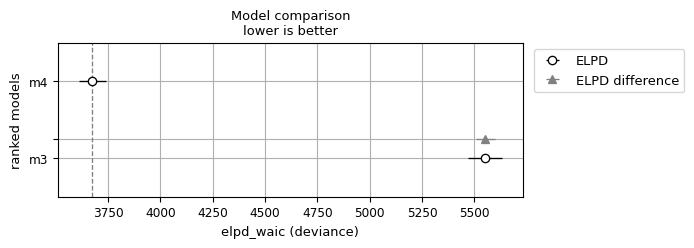

In [18]:
az.plot_compare(comp)
plt.grid()
plt.show()

In [19]:
comp = az.compare(comp_dict, ic='loo', scale='deviance')

/root/filipch/lib/python3.12/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/root/filipch/lib/python3.12/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


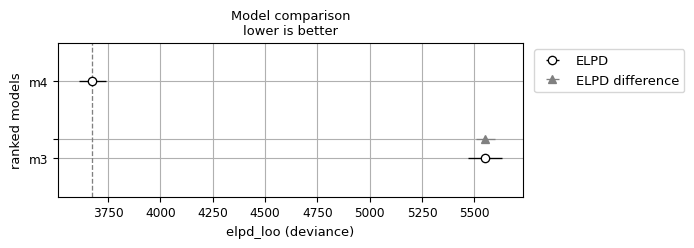

In [20]:
az.plot_compare(comp)
plt.grid()
plt.show()

In [43]:
model5 = CmdStanModel(stan_file='/root/lab6.1/lab6/code_5.stan')

In [44]:
X = mod2.iloc[0, 2:-N-3].values.reshape((-1, 3))


In [48]:
N = 1200  
X = X[:N]  




In [ ]:
R = 1000
sim5_1=model5.sample(data={'N': N, 'K': 1, 'y': mod2.iloc[0, -N:], 'X': X[:,:1]},
iter_sampling=R,
iter_warmup=1,
chains=1,
show_console=True
)

sim5_2=model5.sample(data={'N': N, 'K': 2, 'y': mod2.iloc[0, -N:], 'X': X[:,:2]},
iter_sampling=R,
iter_warmup=1,
chains=1,
show_console=True
)

sim5_3=model5.sample(data={'N': N, 'K': 3, 'y': mod2.iloc[0, -N:], 'X': X},
iter_sampling=R,
iter_warmup=1,
chains=1,
show_console=True
)


In [50]:
print('1 predictor:', sim5_1.draws_pd().head(),'2 predictors:', sim5_2.draws_pd().head().head())

1 predictor:    chain__  iter__  draw__     lp__  accept_stat__  stepsize__  treedepth__  \
0      1.0     1.0     1.0 -1928.46            0.0     4.28063          0.0   
1      1.0     2.0     2.0 -1928.46            0.0     4.28063          0.0   
2      1.0     3.0     3.0 -1928.46            0.0     4.28063          0.0   
3      1.0     4.0     4.0 -1928.46            0.0     4.28063          0.0   
4      1.0     5.0     5.0 -1928.46            0.0     4.28063          0.0   

   n_leapfrog__  divergent__  energy__  ...  y_hat[1191]  y_hat[1192]  \
0           1.0          1.0   1929.77  ...      5.49113      1.75640   
1           1.0          1.0   1929.45  ...     -5.11993     -1.48564   
2           1.0          1.0   1930.00  ...     10.09300     -1.60525   
3           1.0          1.0   1928.71  ...      3.36191    -16.05620   
4           1.0          1.0   1928.84  ...     -3.38697     -6.92188   

   y_hat[1193]  y_hat[1194]  y_hat[1195]  y_hat[1196]  y_hat[1197]  \
0  

In [51]:
comp_dict = {'m5 - 1 predictor': sim5_1, 'm5 - 2 predictors': sim5_2, 'm5 - 3 predictors': sim5_3}

In [52]:
comp = az.compare(comp_dict, ic='loo', scale='deviance')

/root/filipch/lib/python3.12/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/root/filipch/lib/python3.12/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/root/filipch/lib/python3.12/site-packages/arviz/stats/stats.py:789: UserWarning: 

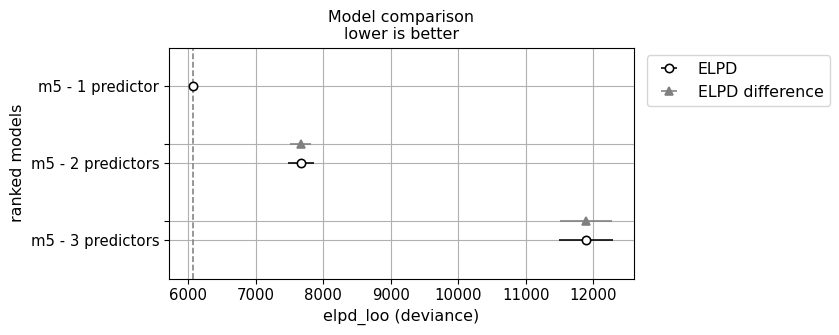

In [53]:
az.plot_compare(comp)
plt.grid()
plt.show()

In [54]:
comp = az.compare(comp_dict, ic='waic', scale='deviance')

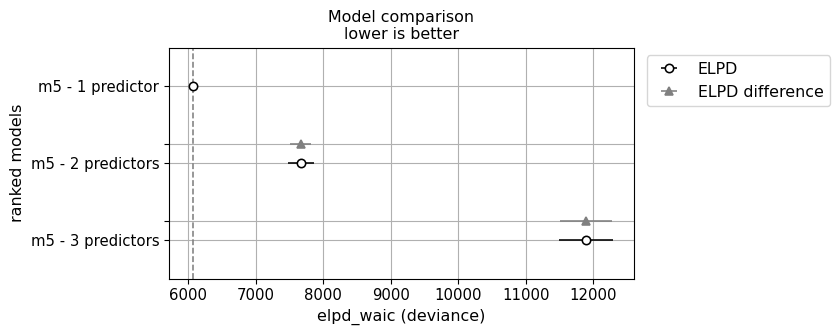

In [55]:
az.plot_compare(comp)
plt.grid()
plt.show()